In [2]:
"""
@ Author : Anirudh Sathish 
@ Roll_No : CS20B1125 

"""

"""
Write a Python program (with pandas) to do the following on the data file “landslide_data2_miss.csv”.
a) Plot a graph of the attribute names (x-axis) with the number of missing values in them (y-axis). (separate python file)
b) Target attribute is “stationid”, Drop the tuples (rows) having missing values in the target attribute.
Print the total number of tuples deleted. Delete (drop) the tuples (rows) having equal to
or more than one third of attributes with missing values. Print the total number of tuples deleted.
c) After (b), count and print the number of missing values in each attributes. 
Also find and print the total number of missing values in the file (after the deletion of tuples)
"""


'\nWrite a Python program (with pandas) to do the following on the data file “landslide_data2_miss.csv”.\na) Plot a graph of the attribute names (x-axis) with the number of missing values in them (y-axis). (separate python file)\nb) Target attribute is “stationid”, Drop the tuples (rows) having missing values in the target attribute.\nPrint the total number of tuples deleted. Delete (drop) the tuples (rows) having equal to\nor more than one third of attributes with missing values. Print the total number of tuples deleted.\nc) After (b), count and print the number of missing values in each attributes. \nAlso find and print the total number of missing values in the file (after the deletion of tuples)\n'

In [213]:
# Defining the neccesary header files 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import math


In [214]:
# Opening the neccesary file 
missing_landslide_data = pd.read_csv("landslide_data3_miss.csv")
print(missing_landslide_data)


          dates stationid  temperature  humidity     pressure      rain  \
0    08-07-2018       t10     25.46875  82.18750  1036.346875      6.75   
1    09-07-2018       t10     26.19298  83.14912  1037.604386   1761.75   
2    10-07-2018       t10     25.17021  85.34043  1037.889362    652.50   
3    11-07-2018       t10          NaN  87.68657  1036.857463    963.00   
4    12-07-2018       t10     24.06923  87.64615  1027.830769    254.25   
..          ...       ...          ...       ...          ...       ...   
940  21-11-2018        t9          NaN  58.69630  1026.797407  73577.25   
941  22-11-2018        t9     15.52482  63.16312  1027.495248  65301.75   
942  23-11-2018        t9     15.81560  59.21277  1029.318511  73534.50   
943  24-11-2018        t9     16.58571  54.63571  1026.776357  72283.50   
944  25-11-2018        t9     17.90000  49.41000  1026.771200  71799.75   

     lightavgw/o0  lightmax  moisture  
0          5.5000    4000.0    0.0000  
1         11.8448  

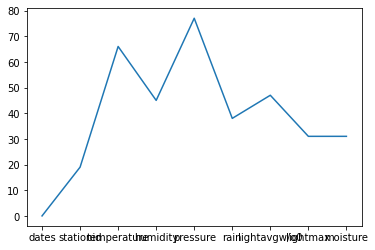

In [215]:
# (a) Plotting the missing values 
missing_val = missing_landslide_data.isnull()
missingWithColumn = missing_val.sum()
missingWithColumn.plot()
plt.show()

In [216]:
target_clear  = missing_landslide_data[missing_landslide_data["stationid"].notnull()]
print(target_clear)

          dates stationid  temperature  humidity     pressure      rain  \
0    08-07-2018       t10     25.46875  82.18750  1036.346875      6.75   
1    09-07-2018       t10     26.19298  83.14912  1037.604386   1761.75   
2    10-07-2018       t10     25.17021  85.34043  1037.889362    652.50   
3    11-07-2018       t10          NaN  87.68657  1036.857463    963.00   
4    12-07-2018       t10     24.06923  87.64615  1027.830769    254.25   
..          ...       ...          ...       ...          ...       ...   
940  21-11-2018        t9          NaN  58.69630  1026.797407  73577.25   
941  22-11-2018        t9     15.52482  63.16312  1027.495248  65301.75   
942  23-11-2018        t9     15.81560  59.21277  1029.318511  73534.50   
943  24-11-2018        t9     16.58571  54.63571  1026.776357  72283.50   
944  25-11-2018        t9     17.90000  49.41000  1026.771200  71799.75   

     lightavgw/o0  lightmax  moisture  
0          5.5000    4000.0    0.0000  
1         11.8448  

In [217]:
# Initial number of tuples 
tuple_inital = missing_landslide_data.shape[0]

# Tuple after drop 
tuple_afterDrop = target_clear.shape[0]

tuple_difference = tuple_inital - tuple_afterDrop
print("Rows Deleted after the first check " , tuple_difference)


Rows Deleted after the first check  19


In [218]:
count = 0 
indexes = []
for i in range(tuple_afterDrop):
    row = target_clear.iloc[i]
    row_bool = row.isnull()
    print(row_bool.sum())
    print(row_bool)
    if(row_bool.sum()>2):
        count+=row_bool.sum()
        indexes.append(i+1)

0
dates           False
stationid       False
temperature     False
humidity        False
pressure        False
rain            False
lightavgw/o0    False
lightmax        False
moisture        False
Name: 0, dtype: bool
0
dates           False
stationid       False
temperature     False
humidity        False
pressure        False
rain            False
lightavgw/o0    False
lightmax        False
moisture        False
Name: 1, dtype: bool
1
dates           False
stationid       False
temperature     False
humidity        False
pressure        False
rain            False
lightavgw/o0    False
lightmax        False
moisture         True
Name: 2, dtype: bool
1
dates           False
stationid       False
temperature      True
humidity        False
pressure        False
rain            False
lightavgw/o0    False
lightmax        False
moisture        False
Name: 3, dtype: bool
0
dates           False
stationid       False
temperature     False
humidity        False
pressure        False
rain

In [219]:
print(indexes)
print(count)

[33, 36, 41, 48, 49, 60, 62, 65, 80, 92, 94, 135, 240, 249, 359, 360, 361, 362, 443, 444, 445, 446, 447, 448, 449, 451, 457, 465, 466, 467, 468, 469, 753, 766, 851]
193


In [220]:
update_target_clear = target_clear.dropna(thresh = 7 , axis = 0 )
print(update_target_clear)

          dates stationid  temperature  humidity     pressure      rain  \
0    08-07-2018       t10     25.46875  82.18750  1036.346875      6.75   
1    09-07-2018       t10     26.19298  83.14912  1037.604386   1761.75   
2    10-07-2018       t10     25.17021  85.34043  1037.889362    652.50   
3    11-07-2018       t10          NaN  87.68657  1036.857463    963.00   
4    12-07-2018       t10     24.06923  87.64615  1027.830769    254.25   
..          ...       ...          ...       ...          ...       ...   
940  21-11-2018        t9          NaN  58.69630  1026.797407  73577.25   
941  22-11-2018        t9     15.52482  63.16312  1027.495248  65301.75   
942  23-11-2018        t9     15.81560  59.21277  1029.318511  73534.50   
943  24-11-2018        t9     16.58571  54.63571  1026.776357  72283.50   
944  25-11-2018        t9     17.90000  49.41000  1026.771200  71799.75   

     lightavgw/o0  lightmax  moisture  
0          5.5000    4000.0    0.0000  
1         11.8448  

In [221]:
Final_update_tuple = update_target_clear.shape[0]
new_diff = tuple_afterDrop - Final_update_tuple
print("The new difference will be ",new_diff)
print("The total Deleted is ",new_diff+tuple_difference)

The new difference will be  35
The total Deleted is  54


In [222]:
# Answer to the C Part 
Final_missing_val = update_target_clear.isnull()
FinalMissingColumnWise = Final_missing_val.sum()
print("The column wise remaining Values :\n" ,FinalMissingColumnWise)
FinalMissing = FinalMissingColumnWise.sum()
print("The Final remaining values " , FinalMissing)

The column wise remaining Values :
 dates            0
stationid        0
temperature     34
humidity        13
pressure        41
rain             6
lightavgw/o0    15
lightmax         1
moisture         6
dtype: int64
The Final remaining values  116


In [223]:
missing_val = missing_landslide_data.isnull()
missingWithColumn = missing_val.sum()
print(missingWithColumn.sum())
print(target_clear.isnull().sum().sum())

354
309


In [224]:
""" 2. Experiments on filling in missing values: 
    a) Replace the missing values by mean of their respective attribute.
     (Use df.fillna() with suitable arguments.)"""
missing_landslide_data.info()
# Sinces dates and stationid are not of numerical type , let us ignore
# these values for now 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dates         945 non-null    object 
 1   stationid     926 non-null    object 
 2   temperature   879 non-null    float64
 3   humidity      900 non-null    float64
 4   pressure      868 non-null    float64
 5   rain          907 non-null    float64
 6   lightavgw/o0  898 non-null    float64
 7   lightmax      914 non-null    float64
 8   moisture      914 non-null    float64
dtypes: float64(7), object(2)
memory usage: 66.6+ KB


In [225]:
missing_landslide_data_numero = missing_landslide_data.drop(['dates','stationid'],axis =1)
df_FilledWithMean = missing_landslide_data_numero.fillna(missing_landslide_data_numero.mean())
df_descrip_Mean_Fill = df_FilledWithMean.describe()
df_descrip_Mean_Fill = df_descrip_Mean_Fill.drop(['count','min','25%','50%','75%','max'],axis = 0)
df_descrip_median_fill = df_FilledWithMean.median()
df_descrip_median_fill = df_descrip_median_fill.to_frame()
df_descrip_median_fill = df_descrip_median_fill.transpose()
df_descrip_median_fill = df_descrip_median_fill.rename(index={0:'Median'})
df_descrip_mode_fill = df_FilledWithMean.mode()
df_descrip_mode_fill = df_descrip_mode_fill.rename(index={0:'Mode'})
df_fromIncomplete_v1 = pd.concat([df_descrip_Mean_Fill,df_descrip_median_fill,df_descrip_mode_fill])
print(df_fromIncomplete_v1)


        temperature   humidity     pressure          rain  lightavgw/o0  \
mean      21.078545  83.261665  1009.225238  10942.726307   4430.927906   
std        4.243347  17.967910    45.214874  24574.252587   7400.586085   
Median    21.800000  90.119050  1014.070741     24.750000   1911.233800   
Mode      21.078545  99.000000  1009.225238      0.000000   4488.910300   

            lightmax   moisture  
mean    21650.163020  32.671968  
std     21678.196144  33.415806  
Median   7544.000000  17.723400  
Mode     4000.000000   0.000000  


In [226]:
df_original = pd.read_csv("landslide_data3_original.csv")
df_original_data_numero = df_original.drop(['dates','stationid'],axis =1)
df_Originaldescrip_Mean_Fill = df_original_data_numero.describe()
df_Originaldescrip_Mean_Fill = df_Originaldescrip_Mean_Fill.drop(['count','min','25%','50%','75%','max'],axis = 0)
df_Originaldescrip_median_fill = df_original_data_numero.median()
df_Originaldescrip_median_fill = df_Originaldescrip_median_fill.to_frame()
df_Originaldescrip_median_fill = df_Originaldescrip_median_fill.transpose()
df_Originaldescrip_median_fill = df_Originaldescrip_median_fill.rename(index={0:'Median'})
df_Originaldescrip_mode_fill = df_original_data_numero.mode()
df_Originaldescrip_mode_fill = df_Originaldescrip_mode_fill.rename(index={0:'Mode'})
df_fromComplete_v1 = pd.concat([df_Originaldescrip_Mean_Fill ,df_Originaldescrip_median_fill,df_Originaldescrip_mode_fill])
print(df_fromComplete_v1)


        temperature   humidity     pressure          rain  lightavgw/o0  \
mean      21.214888  83.479932  1009.008774  10701.538370   4438.428453   
std        4.355818  18.210065    46.980477  24852.255288   7573.162806   
Median    22.272730  91.380950  1014.677832     18.000000   1656.880000   
Mode      12.727270  99.000000   789.392692      0.000000   4488.910300   

            lightmax   moisture  
mean    21788.623280  32.386053  
std     22064.993089  33.653245  
Median   6634.000000  16.704200  
Mode     4000.000000   0.000000  


In [227]:
df_new_v1_diff = df_fromComplete_v1 - df_fromIncomplete_v1
print("The difference between the values ")
print(df_new_v1_diff)

The difference between the values 
        temperature  humidity    pressure        rain  lightavgw/o0  \
mean       0.136343  0.218267   -0.216464 -241.187936      7.500547   
std        0.112471  0.242155    1.765603  278.002701    172.576721   
Median     0.472730  1.261900    0.607091   -6.750000   -254.353800   
Mode      -8.351275  0.000000 -219.832545    0.000000      0.000000   

          lightmax  moisture  
mean    138.460261 -0.285916  
std     386.796945  0.237438  
Median -910.000000 -1.019200  
Mode      0.000000  0.000000  


In [248]:
# Do the RMSE Cacluations 
from operator import index


placedMean = missing_landslide_data_numero.mean()
sum = 0 
for i in range(len(df_original_data_numero.index)):
    x_i = df_original_data_numero.loc[i]
    val = x_i - placedMean
    sum += placedMean*placedMean

sum = sum.to_frame()
sum = sum.transpose()
for column in sum.columns:
    Req_Name = "RMSE_"+column
    sum[Req_Name] = math.sqrt(sum[column])/2
RMSE_v1 = sum.drop(['temperature','humidity','pressure','rain','lightavgw/o0','lightmax','moisture'], axis=1)
print(RMSE_v1)
RMSE_v1 = RMSE_v1.transpose()
RMSE_v1 = RMSE_v1.rename(columns = {'0':})
print(RMSE_v1)

   RMSE_temperature  RMSE_humidity  RMSE_pressure      RMSE_rain  \
0        323.986225     1279.76727   15512.221984  168194.366562   

   RMSE_lightavgw/o0  RMSE_lightmax  RMSE_moisture  
0       68105.250152  332772.231807     502.182077  
                               0
RMSE_temperature      323.986225
RMSE_humidity        1279.767270
RMSE_pressure       15512.221984
RMSE_rain          168194.366562
RMSE_lightavgw/o0   68105.250152
RMSE_lightmax      332772.231807
RMSE_moisture         502.182077
